In [14]:
import pandas as pd
import re
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
import matplotlib.pyplot as plt

<h2> Data clean-up

In [15]:
df = pd.read_csv('../data/polo_data.csv',sep=';')
print(len(df))
df.head()

807


,price,model_year,km,reg,fuel_type,fuel_economy,horse_power,gear_type,zip_code
0,154.900 kr.,2018,147000,2018-02-28,Benzin,21.7,95,A,7700
1,339.900 kr.,2022,8000,2022-06-03,Benzin,17.5,207,A,4700
2,209.900 kr.,2018,73000,2018-05-25,Benzin,21.7,95,A,3520
3,7.900 kr.,2002,280000,2002-10-16,Benzin,15.5,75,M,6000
4,249.800 kr.,2018,72000,2018-08-15,Benzin,16.9,200,A,6760


In [16]:
df['price'] = df['price'].str.replace(r'\D','',regex=True)
df['price'] = df['price'].astype('int64')
df['reg'] = df['reg'].str.split('-').str[0]
df['reg'] = df['reg'].astype('int64')
df

,price,model_year,km,reg,fuel_type,fuel_economy,horse_power,gear_type,zip_code
0,154900,2018,147000,2018,Benzin,21.7,95,A,7700
1,339900,2022,8000,2022,Benzin,17.5,207,A,4700
2,209900,2018,73000,2018,Benzin,21.7,95,A,3520
3,7900,2002,280000,2002,Benzin,15.5,75,M,6000
4,249800,2018,72000,2018,Benzin,16.9,200,A,6760
...,...,...,...,...,...,...,...,...,...
802,189900,2018,88000,2018,Benzin,21.3,115,A,6500
803,249900,2019,27000,2019,Benzin,18.0,200,A,6270
804,192000,2016,42000,2015,Benzin,21.3,150,A,5700
805,73500,2010,161000,2010,Diesel,29.4,75,M,2100


In [17]:
df = pd.get_dummies(df, columns = ['gear_type','fuel_type'])
df

,price,model_year,km,reg,fuel_economy,horse_power,zip_code,gear_type_A,gear_type_M,fuel_type_Benzin,fuel_type_Diesel
0,154900,2018,147000,2018,21.7,95,7700,1,0,1,0
1,339900,2022,8000,2022,17.5,207,4700,1,0,1,0
2,209900,2018,73000,2018,21.7,95,3520,1,0,1,0
3,7900,2002,280000,2002,15.5,75,6000,0,1,1,0
4,249800,2018,72000,2018,16.9,200,6760,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
802,189900,2018,88000,2018,21.3,115,6500,1,0,1,0
803,249900,2019,27000,2019,18.0,200,6270,1,0,1,0
804,192000,2016,42000,2015,21.3,150,5700,1,0,1,0
805,73500,2010,161000,2010,29.4,75,2100,0,1,0,1


<h2> Prediction

In [18]:
X = df[['model_year', 'km','reg','fuel_economy','horse_power','gear_type_A','gear_type_M','fuel_type_Benzin','fuel_type_Diesel']]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [19]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
model.score(X_test, y_test)
#predictions.shape

0.9675602761501011

In [20]:
def get_prediction_score(target,pred_target):
    score_list = []
    for num1,num2 in zip(target,pred_target):
        if num1 > num2:
            score_list.append(num2/num1*100)
        elif num2 > num1:
            score_list.append(num1/num2*100)
        else:
            score_list.append(100)
    return sum(score_list) / len(score_list)

In [21]:
get_prediction_score(y_test,predictions)

93.88500703411188

In [22]:
test_dict = {
    'model_year':2018,
    'km': 40000,
    'reg':2019,
    'fuel_economy':19.3,
    'horse_power':100,
    'gear_type_A': 1,
    'gear_type_M': 0,
    'fuel_type_Benzin': 1,
    'fuel_type_Diesel': 0
}
test_df = pd.DataFrame(data= test_dict, index=[0])
test_df

,model_year,km,reg,fuel_economy,horse_power,gear_type_A,gear_type_M,fuel_type_Benzin,fuel_type_Diesel
0,2018,40000,2019,19.3,100,1,0,1,0


In [23]:
#239900
model.predict(test_df)

array([199900.])

In [24]:
y_test

697    209900
296     89900
227    204800
336    179900
537    224900
        ...  
668    200000
673    129700
753    124800
751    160000
516    137700
Name: price, Length: 162, dtype: int64

<h2> Data visiulization

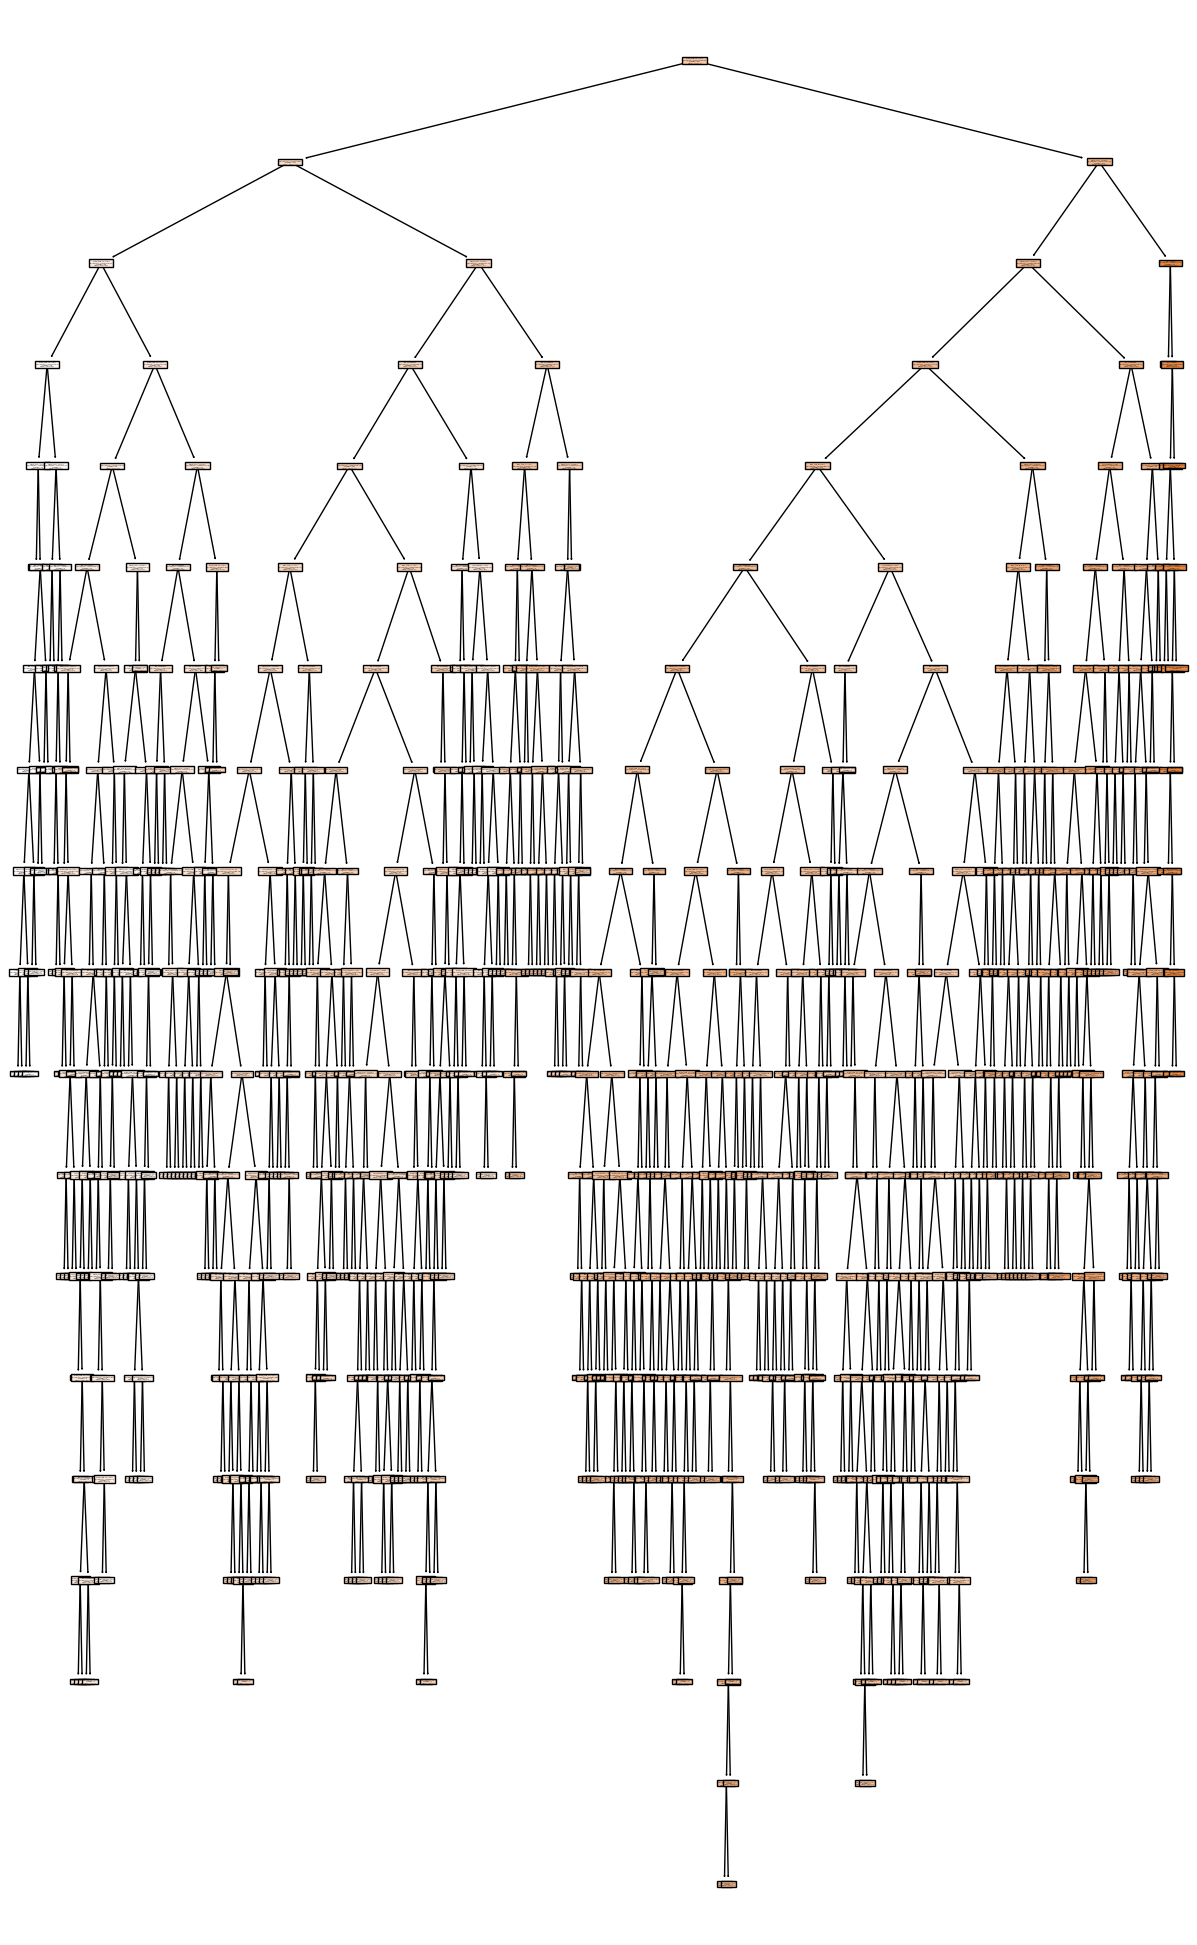

In [25]:
fig = plt.figure(figsize=(15,25))
_= tree.plot_tree(model, feature_names=X.columns, filled=True)